**Batch Gradient Descent with early stopping for Softmax Regression**<br><br>
**Overview**

* Get and visualize data
* Train, validation, and test sets
* Transform labels into one-hot vectors

* **Batch gradient descent**
   * Calculate z for each class (z = wx + b)
   * Apply softmax to the z for each class
   * When cost starts incresasing, we will stop the algorithm
* Predict

In [1718]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits # MNIST dataset
from sklearn.model_selection import train_test_split

%matplotlib inline
%reset

Nothing done.


**Step 1: Get and visualize data**

Size of each training example: (64,)


<Figure size 432x288 with 0 Axes>

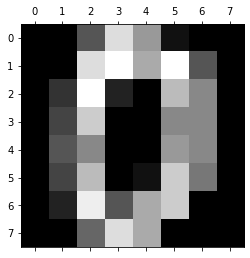

In [1719]:
digits = load_digits()

X = digits['data']
y = digits['target']

# each image is already flattened
# 8 x 8 images flattened = 64 len array
print(f'Size of each training example: {X[0].shape}')

plt.gray()
plt.matshow(digits.images[0])
plt.show()

**Step 2: Train and test sets**

In [1720]:
# split twice to get the val set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)

**Step 3: One-hot labels**

In [1721]:
def one_hot(y, num_classes):
    m = len(y)
    y_hot = np.zeros((m, num_classes))

    for i in range(m):
        y_hot[i, y[i]] = 1
    
    return y_hot

In [1722]:
print('----------------Before----------------')
print(y_train[:10])

num_classes = 10
y_train_1hot = one_hot(y_train, num_classes)

print('\n\n----------------After----------------')
print(y_train_1hot[:10])

----------------Before----------------
[0 2 0 8 8 1 8 9 9 5]


----------------After----------------
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


**Step 4: Helper functions for Gradient Descent**

In [1723]:
def softmax(z):
    p_hat = np.exp(z)

    for i in range(len(z)):
        p_hat[i] /= np.sum(p_hat[i])

    return p_hat

In [1724]:
def cross_entropy_loss(p_hat, y):
    # y is not one-hot in this loss function
    return -np.mean(np.log(p_hat[np.arange(len(y)), y]))

**Step 5: Training**

In [1725]:
def fit(X, y, lr, num_classes, epochs, alpha):
    m, n = X.shape

    # random initialize weights and bias
    w = np.random.random((n, num_classes))
    b = np.random.random(num_classes)

    cost_history = []
    best_cost = 999
    
    try:
        for epoch in range(epochs):
            # calculate z
            z = X.dot(w) + b

            # one-hot encode y
            y_hot = one_hot(y, num_classes)

            # softmax to get class probabilities
            p_hat = softmax(z)

            # gradients
            w_grad = (1 / m) * np.dot(X.T, (p_hat - y_hot))
            b_grad = (1 / m) * np.sum(p_hat - y_hot)

            # updating weights and biases
            w = w - lr * w_grad
            b = b - lr * b_grad

            # calculate cost and add to cost history
            cost = cross_entropy_loss(p_hat, y)
            cost = cost + alpha * (1/2 * np.sum(np.square(w))) # l2 regularization

            # early stop check
            if cost < best_cost:
                best_cost = cost
            else:
                raise UnboundLocalError
            
            cost_history.append(cost)

            # display epoch and cost every so often
            if epoch % 500 == 0:
                print(f'At epoch {epoch}, the cost is {cost}')
    except UnboundLocalError:
        print("EARLY STOPPING")
        print(epoch, cost)

    return w, b, cost_history

In [1726]:
num_classes = 10
learning_rate = 0.01
num_epochs = 100000000 # early stop will stop us at the optimal place
alpha = 0.3
weights, biases, cost_history = fit(X_train, y_train, learning_rate, num_classes, num_epochs, alpha)

At epoch 0, the cost is 59.078968631975144
At epoch 500, the cost is 31.701268468790314
At epoch 1000, the cost is 31.566381041043034
EARLY STOPPING
1286 31.555676839258627


**Nice! the cost is clearly decreasing after every iteration of Gradient Descent!**
* Lets use our optimized weights and biases to make our predictions!

**Step 6: Predicting**

In [1727]:
def predict(X, w, b):
    z = X.dot(w) + b
    p_hat = softmax(z)

    predicted_class = np.argmax(p_hat, axis=1)

    return predicted_class

In [1728]:
def accuracy(y_pred, y):
    m = len(y)
    return np.sum(y == y_pred) / m

In [1729]:
train_predictions = predict(X_train, weights, biases)
train_accuracy = accuracy(train_predictions, y_train)

print(f'Train accuracy: {np.round(100*train_accuracy, 2)}%')

test_predictions = predict(X_test, weights, biases)
test_accuracy = accuracy(test_predictions, y_test)

print(f'Test accuracy: {np.round(100*test_accuracy, 2)}%')

Train accuracy: 98.69%
Test accuracy: 96.67%


**Now lets visualize some of our predictions**

<Figure size 432x288 with 0 Axes>

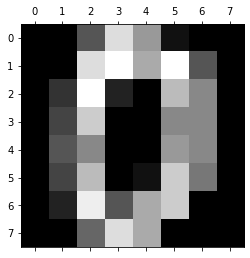

Actual class: 0
Predicted class: 0


<Figure size 432x288 with 0 Axes>

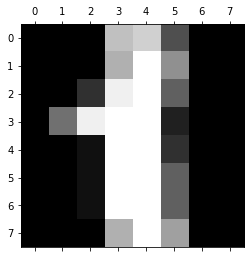

Actual class: 1
Predicted class: 1


<Figure size 432x288 with 0 Axes>

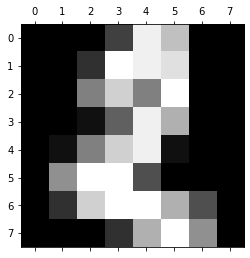

Actual class: 2
Predicted class: 2


<Figure size 432x288 with 0 Axes>

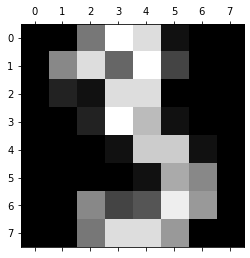

Actual class: 3
Predicted class: 3


<Figure size 432x288 with 0 Axes>

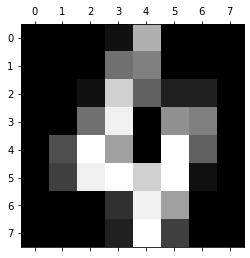

Actual class: 4
Predicted class: 4


<Figure size 432x288 with 0 Axes>

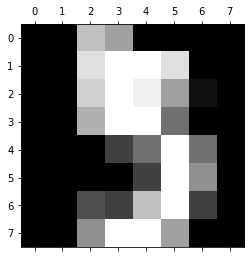

Actual class: 5
Predicted class: 5


In [1730]:
for i in range(6):
    plt.gray()
    plt.matshow(digits.images[i])
    plt.show()

    all_predictions = predict(X, weights, biases)

    print(f'Actual class: {y[i]}')
    print(f'Predicted class: {all_predictions[i]}')